# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [100]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = 255*np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))
port = np.array(Image.open('img/port.jpg'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [57]:
def computeFT(I):
    return np.fft.fft2(I)
def toVisualizeFT(If):
    return np.fft.fftshift(If)

def toVisualizeLogFT(If):
    return np.log(1+np.abs(If))

def thresholdImage(I,s):
    test=np.copy(I)
    test=np.where(test<s, 0, 255)
    return test

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

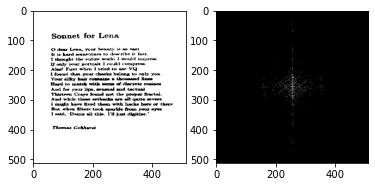

In [66]:
import matplotlib.pyplot as plt
ft=computeFT(son)
ft2=computeFT(sonrot)
mod=toVisualizeFT(ft)
mod2=toVisualizeFT(ft2)
mod=thresholdImage(mod,pow(10,5))
mod2=thresholdImage(mod2,pow(10,5))
plt.subplot(121),plt.imshow(son, cmap = 'gray')
plt.subplot(122),plt.imshow(mod, cmap = 'gray')

#plt.subplot(121),plt.imshow(sonrot, cmap = 'gray')
#plt.subplot(122),plt.imshow(mod2, cmap = 'gray')




plt.show()
# your code below

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [39]:
def blend(I1,I2,alpha):
    return alpha*I1+(1-alpha)*I2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x11d93da60>)

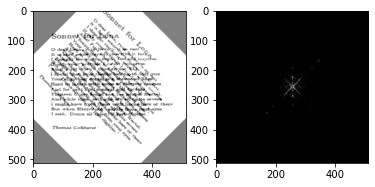

In [68]:
bldson=blend(son,sonrot,0.5)
ft3=computeFT(bldson)
mod3=toVisualizeFT(ft3)
mod3=thresholdImage(mod3,pow(10,5))
plt.subplot(121),plt.imshow(bldson, cmap = 'gray')
plt.subplot(122),plt.imshow(mod3, cmap = 'gray')


6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [97]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I):
    ft=computeFT(I)
    mod=thresholdImage(ft,3*pow(10,5))
    return rotateImage(I,-mainOrientation(mod)[1])


8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x11a1a9400>)

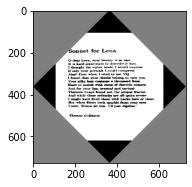

In [105]:
sinrotRect=rectifyOrientation(sonrot)

plt.subplot(121),plt.imshow(sinrotRect, cmap = 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x11a0d52b0>)

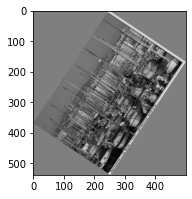

In [104]:
portRect=rectifyOrientation(port)
#plt.subplot(121),plt.imshow(port, cmap = 'gray')
plt.subplot(121),plt.imshow(portRect, cmap = 'gray')